# PROPOSED INVESTIGATION: TWITTER SENTIMENTAL ANALYSIS FOR FIVE MAJOR BANKS IN SOUTH AFRICA
                                      DATE: 20 MARCH 2023
                                      COURSE: DATA PROGRAMMING MODULE
                                      NAME: NDIMPHIWE MANGQISHI 220376804
                                      COURSEWORK 2 SUBMISSION


## 1. INTRODUCTION/CONTEXT


The proposed project is based on twitter sentiment analysis for the five major banks in South Africa.This analysis is conducted for a period of one month in December 2022. South African people have been complaining alot lately about the service they are recieving from all major banks in South Africa, particularly in the festive season period when the majority of people are on leave and there are also visitors in the country from other countries. This project would like to investigate how customers are being treated, and how do they feel about each bank in South Africa. The frustrations they get and how are they handled by banks.This will be done by sourcing data from the twitter platform through an tweeter Aplication Programming Interface (API) and snscrape module. Tweeeter API has limitation and the approval process for academic Research package is long and complex.

There are five major conventional banks in South Africa, and, the analysis will be conducted in all of them, namely: First national bank (FNB),  Capitec bank, Nedbank, Standard bank and ABSA Bank. Conventional banks refers to the banks that still use the old and modern way of banking, this means the banks that still have ATMs, physical branches etc. There are other banks in South Africa that use the modern ways of banking like fully digital, no ATM or branches, only done through online applications.

The banks that will be analysed in this proposed project will be ABSA bank with a twitter handle name of @ABSASouthAfrica, Capitec bank with a twitter screeen name of @CapitecBankSA, Nedbank with a twitter handle name of @Nedbank, FNB with home name of @FNBSA and Standard Bank with a twitter screen name of @StandardBankZA.


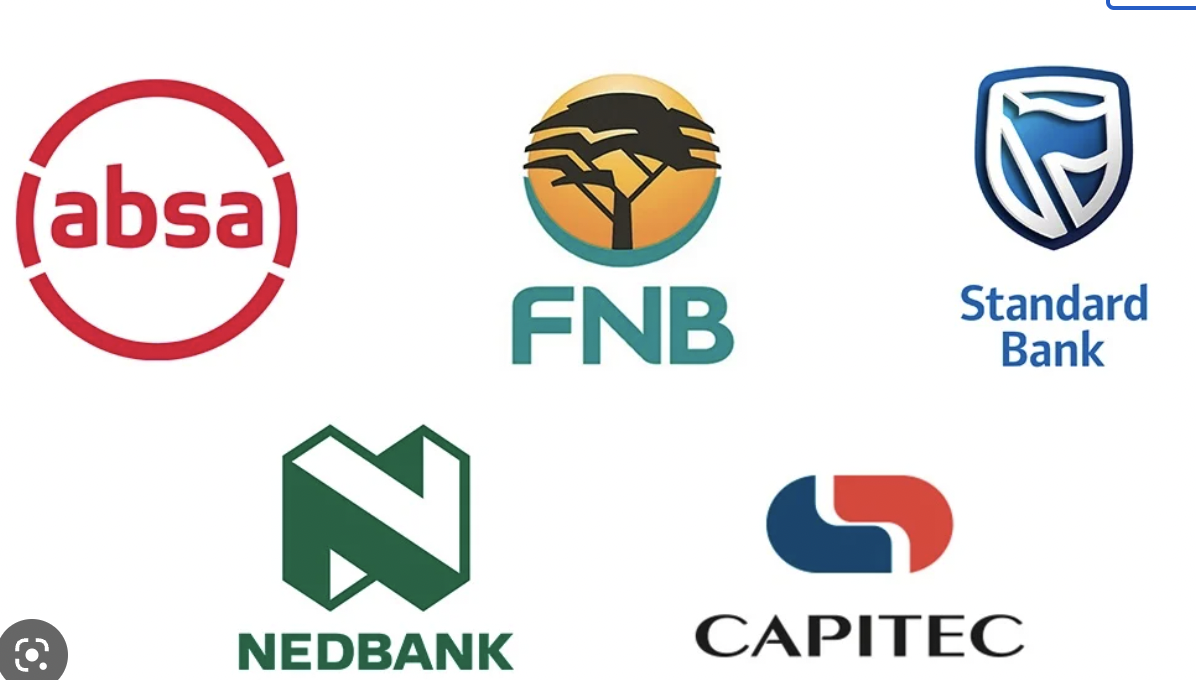

    

The outcomes of this investigation will paint a clear picture of how do the customers feel about their respective bank servirces. These results if meet the required standards will be shared with the banks through my linkedin network as well as my gitHub repository.

## 2. Objective of the Project

1. The main purpose of this investigation is to find out which bank offer great custommer services according to the feelings of the bank customers on twitter.
2. The aim is to help the banks understand how their customers feel about their services so that they can start improving where they are lacking.
3. The final end goal of this project is to train a model and do prediction using supervised learning algorithms. That way we will see how good is our analysis for use in the real world.
4. In this analysis I aim to achieve an accuracy F1-score for the trained models of atleast 75% or more for all five banks.

## 3. Description of Data Set

The data is in the form of messages or tweets wriiten by either the customers or the bank twitter handlers. The tweets are collected directly from the twitter platform using either twitter API called Tweepy and snscrape module. There is a process followed for one to be able to utilized the twitter API and it is long, as an alternative I decided to use the second one in case twitter API access application fails. 

As social media has become the platform that generate vast amount of data that can be useful in most businesses to improve their services, APIs have become the most important tool to collect data from these social media pages. In this project we will use either Twitter API version 2 or snscrape to collect those tweets.

There are a number of ways academic researchers can use twitter API to perform their research, Twitter has about four levels, the first two are free, the last two, an approval is required to prove that you are a reseracher from the University or reserach group lab. The first two are limited in terms of the amount of data to be collected. The approval process for the last two needs supporting documentation and can take up to Twenty one (21) days to get approval. This is the limitation for a twitter API route, however, there are other packages that can source tweets without limitation, the one used here is snscrape.

To gain access or to be able to use twitter API to collect data, one needs to have an existing twittwer account and can apply for developer account to get access credentials. Once those secret access details tokens are provided, then the user can create an application about his/her project and start using the lower packages of accessing the data. In this project we currently using the second level called essential which is limited to a certain number of tweets you can get and certain serach methods you can use. Hence we use snscrape.

For each bank, data samples was 5000 tweets and the dataset is submitted together with the this notebook. Each bank has its generated csv file named by it's name. for example, ABSA_Tweets.csv, Nedbank_Tweets.csv, Standard_Tweets.csv, Capitec_Tweets.csv and FNB_Tweets.csv. The image presenting the name of the banks will also be submitted together with this report.

In terms of the ethics on the use of data, data is an open data source that is publicly available for everyone to use. From the tweeter side i have a deveoper account approved to use the data but with the limitation of how many tweets you can collect a month based on the level/plan you are currently in. It will be hard to anonymize the name of the banks even if there was a need, however in this case there is not need for that as the banks are also keen to understand their product performance, they are open to research like this. Furthermore, when searching the tweets you still need to use their user name or screen name which is the same as the name of the bank.


## 4. Importing the Libraries to be used in the Analysis

In [1]:
#Import the Libraries that required to undetake the analysis
import tweepy
import csv
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
plt.style.use('fivethirtyeight')
import nltk
from sklearn.preprocessing import LabelEncoder
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import snscrape.modules.twitter as sntwitter


## 5. Secret Codes for Twitter API

These are the secret codes obtained from the twitter developer account application and every individual has his/her own codes and they need to be saved in a secured place so tha another person cannot use it under your name. In this case I saved the in my secured directory of my personal machine and here I loaded here as a CSV file using pandas.

In [2]:
#Get the the secret D,codes data
API_keys = pd.read_csv('API_keys.csv', sep = ';', quotechar='"', encoding = 'utf8')


In [3]:
# Twitter API credentials
ConsumerKey = API_keys['Keys'][0]
ConsumerSecret = API_keys['Keys'][1]
AccessToken = API_keys['Keys'][3]
AccessTokenSecret = API_keys['Keys'][4]


The following is the process one follows to obtain the authorization to access the data using the above keys.

In [4]:
#Create the Authentication object
Authenticate = tweepy.OAuthHandler(ConsumerKey,ConsumerSecret)

#set the access token and the access token secret
Authenticate.set_access_token(AccessToken, AccessTokenSecret)

#create the API object while passing in the auth information
api = tweepy.API(Authenticate, wait_on_rate_limit = True)

## 6. Collects Tweets for AbsaSouthAfrica using Twitter API

It can be noted that the approved level for collecting these tweets is limited to 200 per request, therefore the output will be limited to that 200 per bank for now, however, this issue was resolved by using a different method to collect the tweets for the december 2022 period.

In [5]:
#Extract 200 tweets from the twitter user
posts = api.user_timeline(screen_name ="AbsaSouthAfrica", count = 200, exclude_replies = False,include_rts =True )

#print the last five tweets from the account
for tweet in posts[0:5]:
    print(tweet.text + '\n')

@t_mpondo Hi there; how can we assist you?

@Nkosana_Ncube86 We've replied to your other post; we can chat there. https://t.co/Y91Sa2GD66

@ItsJewel28 Hi there, we have responded to your inbox.

@TheRealQueen_B_ Hi there; thank you for reporting the matter to us. Kindly provide us with the exact location to e… https://t.co/SOBI3nl2Se

@dakiller_rsa Hi there, we have responded to your inbox.



In [6]:
#Create a dataFrame with a column called tweets
df = pd.DataFrame([tweet.text for tweet in posts], columns = ['ABSA_Tweets'])
df.head()

,ABSA_Tweets
0,@t_mpondo Hi there; how can we assist you?
1,@Nkosana_Ncube86 We've replied to your other p...
2,"@ItsJewel28 Hi there, we have responded to you..."
3,@TheRealQueen_B_ Hi there; thank you for repor...
4,"@dakiller_rsa Hi there, we have responded to y..."


In [7]:
df_absa = df.to_csv("ABSA_data.csv", index = False)

## 6. Collects Tweets for AbsaSouthAfrica using snscrape

The tweets are being collected using snscrape since the twitter API has limittation and the approval process is long.

In [8]:
query = "(@AbsaSouthAfrica) until:2023-01-02 since:2022-12-01"
tweets = []
limit = 5000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.date,tweet.user.username, tweet.content])

/var/folders/sb/fznt44wn5rbcm9dksfb9qhy40000gn/T/ipykernel_5791/3043641816.py:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date,tweet.user.username, tweet.content])


In [9]:
# create a data frame
df = pd.DataFrame(tweets, columns = ['Date', 'User', 'ABSA_Tweets'])

In [10]:
# save the file in a csv file
df_absa1 = df.to_csv("ABSA_Tweets.csv", index = False)

In [11]:
#read the train data from a csv file
df_a = pd.read_csv('ABSA_Tweets.csv')

In [12]:
df_a.head()

,Date,User,ABSA_Tweets
0,2023-01-01 23:13:22+00:00,whatabout303,@AbsaSouthAfrica someone made a cash transfer ...
1,2023-01-01 19:43:20+00:00,PeterjabulaniK,@Hollywoodbets @AbsaSouthAfrica I have made a...
2,2023-01-01 19:30:41+00:00,leehle09,I'm so disappointed with @AbsaSouthAfrica I bo...
3,2023-01-01 18:14:42+00:00,Sir_M_Charles,@KaraboMokwele_ @AbsaSouthAfrica Lol yey you'r...
4,2023-01-01 18:11:27+00:00,KaraboMokwele_,@Sir_M_Charles Rich kae @AbsaSouthAfrica e re ...


In [13]:
df_a.shape[0]

5000

## 7. Functions to Clean the Tweets

Functions were created to make sure that a repeatation of steps is avoided and a good programming practice is employed to reuse the functions in the Analysis. There area a number of functions utilized such as cleaning data, Tokenization and stopwords removal. Functions to get the polarities and subjectivity.

In [14]:
# import the string punctuation library
import string

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
# First function to clean the data
def msg_cleaning(text):
    """This function takes tweets as text and remove all punctuations, 
    then joins the clean text"""
    clean_text = [char for char in text if char not in string.punctuation]
    clean_text = ''.join(clean_text)
    return clean_text

In [20]:
# using the function on the tweets column.
df_a['ABSA_Tweets'] = df_a['ABSA_Tweets'].apply(msg_cleaning)

In [21]:
#removing Emojis
df_a = df_a.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [22]:
df_a.head()

,Date,User,ABSA_Tweets
0,2023-01-01 23:13:22+00:00,whatabout303,AbsaSouthAfrica someone made a cash transfer t...
1,2023-01-01 19:43:20+00:00,PeterjabulaniK,Hollywoodbets AbsaSouthAfrica I have made a w...
2,2023-01-01 19:30:41+00:00,leehle09,Im so disappointed with AbsaSouthAfrica I boug...
3,2023-01-01 18:14:42+00:00,Sir_M_Charles,KaraboMokwele AbsaSouthAfrica Lol yey youre rich
4,2023-01-01 18:11:27+00:00,KaraboMokwele_,SirMCharles Rich kae AbsaSouthAfrica e re scama


In [23]:
#Create a function to get the subjectivity and Polarity
#function to get subjectivity
def getSubjectivity(text):
    """Function that gets the subjectivity of a tweet"""
    return TextBlob(text).sentiment.subjectivity

#function to get Polarity
def getPolarity(text):
    """Function to obtain polarity that will be used together with subjectivity
    to create labels or sentiments"""
    return TextBlob(text).sentiment.polarity

#create two new columns
df_a['Subjectivity'] = df_a['ABSA_Tweets'].apply(getSubjectivity)
df_a['Polarity'] = df_a['ABSA_Tweets'].apply(getPolarity)



In [24]:
df_a.head()

,Date,User,ABSA_Tweets,Subjectivity,Polarity
0,2023-01-01 23:13:22+00:00,whatabout303,AbsaSouthAfrica someone made a cash transfer t...,0.358333,0.0750
1,2023-01-01 19:43:20+00:00,PeterjabulaniK,Hollywoodbets AbsaSouthAfrica I have made a w...,0.000000,0.0000
2,2023-01-01 19:30:41+00:00,leehle09,Im so disappointed with AbsaSouthAfrica I boug...,0.750000,-0.7500
3,2023-01-01 18:14:42+00:00,Sir_M_Charles,KaraboMokwele AbsaSouthAfrica Lol yey youre rich,0.725000,0.5875
4,2023-01-01 18:11:27+00:00,KaraboMokwele_,SirMCharles Rich kae AbsaSouthAfrica e re scama,0.750000,0.3750


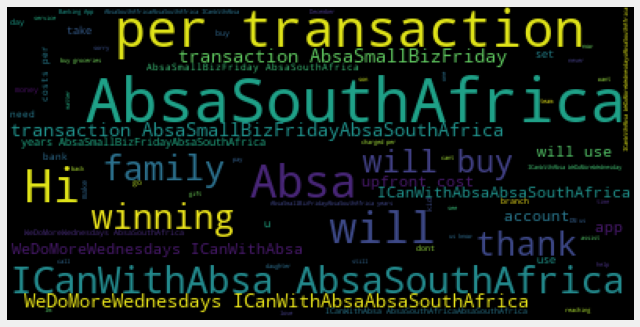

In [34]:
# Use wordcloud to visiualize most used words in the tweet.
tweets = df_a['ABSA_Tweets'].tolist()
tweets_as_one_string = "".join(tweets)
plt.figure(figsize = (10,20))
plt.imshow(WordCloud().generate(tweets_as_one_string))
plt.axis('off')
plt.show()

In [35]:
#Create a function to get Positive, Neutral, and Negative Analysis
def getAnalysis(score):
    """Function to get the labels of the sentiments as indicated below"""
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
df_a['Analysis'] = df_a['Polarity'].apply(getAnalysis)

df_a.head()
    


,Date,User,ABSA_Tweets,Subjectivity,Polarity,Analysis
0,2023-01-01 23:13:22+00:00,whatabout303,AbsaSouthAfrica someone made a cash transfer t...,0.358333,0.0750,Positive
1,2023-01-01 19:43:20+00:00,PeterjabulaniK,Hollywoodbets AbsaSouthAfrica I have made a w...,0.000000,0.0000,Neutral
2,2023-01-01 19:30:41+00:00,leehle09,Im so disappointed with AbsaSouthAfrica I boug...,0.750000,-0.7500,Negative
3,2023-01-01 18:14:42+00:00,Sir_M_Charles,KaraboMokwele AbsaSouthAfrica Lol yey youre rich,0.725000,0.5875,Positive
4,2023-01-01 18:11:27+00:00,KaraboMokwele_,SirMCharles Rich kae AbsaSouthAfrica e re scama,0.750000,0.3750,Positive


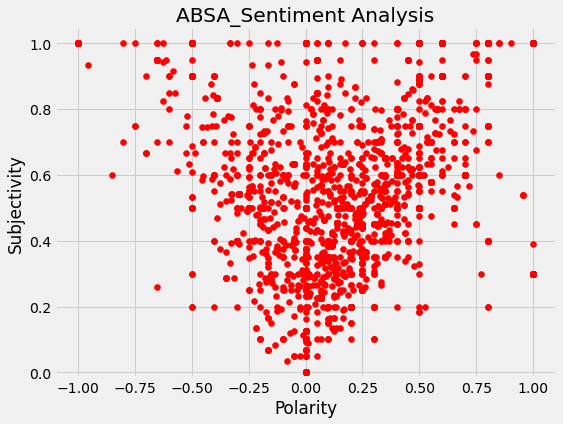

In [36]:
# Plot the Polarity and Subjectivity
plt.figure(figsize = (8,6))
for i in range(0,df_a.shape[0]):
    plt.scatter(df_a['Polarity'][i], df_a['Subjectivity'][i], color = 'Red')
plt.title('ABSA_Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

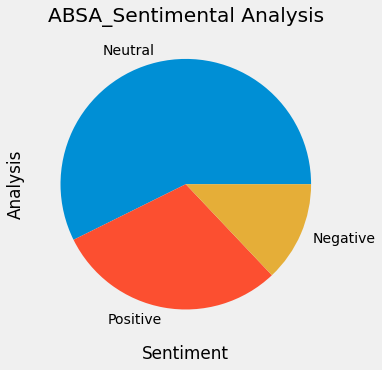

In [43]:
#Show the Value Counts
df_a["Analysis"].value_counts()
#Plot and Visualize the counts
plt.figure(figsize = (5,8))
plt.title("ABSA_Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel('Counts')
df_a["Analysis"].value_counts().plot(kind="pie")
plt.show()

### Critical Analysis for ABSA_Tweeta data

The pie chart above shows the ABSA sentiments from the user's tweets. Looking at the chart, one can conclude that the neutral sentiment is dominating with approximately 55% sentiments. This is followed by positive sentiments with approximately 25%, and lastly the negative are too small with approximately 15% - 20%, which is a good thing.However improvements needs to be made to reduce neutral sentiments and increase positive ones.

In [44]:
df_a = df_a[['ABSA_Tweets', 'Analysis']]

In [48]:
df_a.head()

,ABSA_Tweets,Analysis
0,AbsaSouthAfrica someone made a cash transfer t...,2
1,Hollywoodbets AbsaSouthAfrica I have made a w...,1
2,Im so disappointed with AbsaSouthAfrica I boug...,0
3,KaraboMokwele AbsaSouthAfrica Lol yey youre rich,2
4,SirMCharles Rich kae AbsaSouthAfrica e re scama,2


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_a['Analysis'] = le.fit_transform(df_a.Analysis)

In [50]:
df_a.head()

,ABSA_Tweets,Analysis
0,AbsaSouthAfrica someone made a cash transfer t...,2
1,Hollywoodbets AbsaSouthAfrica I have made a w...,1
2,Im so disappointed with AbsaSouthAfrica I boug...,0
3,KaraboMokwele AbsaSouthAfrica Lol yey youre rich,2
4,SirMCharles Rich kae AbsaSouthAfrica e re scama,2


In [51]:
import nltk

In [52]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ndimphiwe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
from nltk.corpus import stopwords


In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# function to further clean the data and remove the stop words
def tweet_cleaning(message):
    """this functions takes in tweets text and remove all punctuation,
    split the data and remove stop words to be ready for vectorization pipeline"""
    clean_text = [char for char in message if char not in string.punctuation]
    clean_text = ''.join(clean_text)
    clean_text = [word for word in clean_text.split() if word.lower() not in stopwords.words('english')]
    return clean_text

In [56]:
df_Clean_tweets = df_a['ABSA_Tweets'].apply(tweet_cleaning)

In [57]:
vectorize = CountVectorizer(analyzer = tweet_cleaning)
tweets_countVectorize = CountVectorizer(analyzer = tweet_cleaning, dtype = 'uint8').fit_transform(df_a['ABSA_Tweets']).toarray()

In [58]:
tweets_countVectorize.shape

(5000, 7694)

In [178]:
# these will be the inputs to the training model used in the next phase of the project.
X= tweets_countVectorize
y = df_a['Analysis']

## Split the data into train & test set and train the model -ABSA_tweets

In [60]:
# The data will be split with 70% of the 5000 data to be a train data set and 30% used in the test unseen data set,
X = tweets_countVectorize[:3500, :] 
y = df_a['Analysis'].values[:3500]

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
#Further split the train data set above into 80% train and 20% validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

## Train the model and Assess Trained Model Performance  - ABSA_Tweets

#### Logistical Regression Classifier

In [66]:
# Import regressors and train the model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
model = lr.fit(X_train,y_train)

<AxesSubplot:>

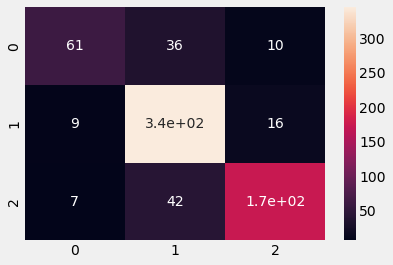

In [68]:
# Diplay using confusion matrics as a heat map.
import seaborn as sns
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [69]:
# Diplay classification report focusing on F1-score as an evualtion measure.
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.57      0.66       107
           1       0.82      0.93      0.87       370
           2       0.87      0.78      0.82       223

    accuracy                           0.83       700
   macro avg       0.83      0.76      0.79       700
weighted avg       0.83      0.83      0.82       700



In [71]:
# prints the final accuracy score.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8285714285714286

### Naive Bayes Classifier

In [73]:
#Use Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model2 = classifier.fit(X_train, y_train)

<AxesSubplot:>

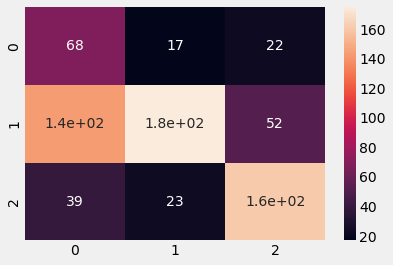

In [74]:
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [75]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.27      0.64      0.38       107
           1       0.81      0.47      0.60       370
           2       0.69      0.72      0.70       223

    accuracy                           0.58       700
   macro avg       0.59      0.61      0.56       700
weighted avg       0.69      0.58      0.60       700



In [76]:
accuracy_score(y_test, y_predict)

0.5771428571428572

### Random Forest Classifier

In [78]:
# Use random forest classifier to train the model.
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model3 = rf.fit(X_train,y_train)

<AxesSubplot:>

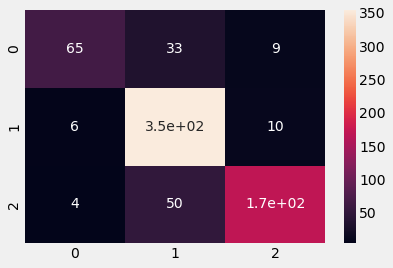

In [79]:
y_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [80]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.61      0.71       107
           1       0.81      0.96      0.88       370
           2       0.90      0.76      0.82       223

    accuracy                           0.84       700
   macro avg       0.86      0.77      0.80       700
weighted avg       0.85      0.84      0.83       700



In [81]:
accuracy_score(y_test, y_predict)

0.84

## Critical Analysis for the accuracy of the trained model - ABSA_Tweets

From the three classifiers chosen to train the model, it is clear from the results that the Naive bayes classifier produced bad results of 57%, which needs improvements. The logistic regression classifier and Random forest classifier produced 82% and 84% respectively. both these regressors improve the results compared to Naive Bayes. Random forest will be the best one to use as the final model for ABSA sentimental analysis.

## Predicting the results on unseen data using the best model

In [82]:
# train data is still the same but the test data is the 30% that was not used for training, its unseen data.
X_train = X
X_test = tweets_countVectorize[3500:, :] 

In [83]:
X_train.shape

(3500, 7694)

In [84]:
X_test.shape

(1500, 7694)

In [85]:
# random forest was the best model for the ABSA Tweets.
rf = RandomForestClassifier()
model_ABSA = rf.fit(X_train,y)

In [86]:
y_predict = rf.predict(X_test)

In [87]:
# create data frame
Output=pd.DataFrame(y_predict, columns=['sentiment'])
Output.head()

,sentiment
0,1
1,1
2,1
3,0
4,1


In [88]:
#Save the results as a csv file
Output.to_csv('ABSA_pred_1.csv',index=False)

## 8. Capitec Bank Analysis which follows the same process

Analysis of the second bank which is  Capitec Bank

In [89]:
query = "(@CapitecBankSA) until:2023-01-02 since:2022-12-01"
tweets = []
limit = 5000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.date,tweet.user.username, tweet.content])
        

/var/folders/sb/fznt44wn5rbcm9dksfb9qhy40000gn/T/ipykernel_5791/915515779.py:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date,tweet.user.username, tweet.content])


In [90]:
#Create a dataFrame with a column called Capitec_Tweets
df_c = pd.DataFrame(tweets, columns = ['Date', 'User', 'Capitec_Tweets'])
df_cap = df_c.to_csv("Capitec_Tweets.csv", index = False)
df_c = pd.read_csv('Capitec_Tweets.csv')
df_c.head()

,Date,User,Capitec_Tweets
0,2023-01-01 20:00:26+00:00,__Siiwe,I am unable to use your app it keeps kicking m...
1,2023-01-01 17:49:14+00:00,Emperor_Makola,@CapitecBankSA Is there any particular reason ...
2,2023-01-01 17:21:47+00:00,hobosapians,@CapitecBankSA @MagdMol4 Will you also receive...
3,2023-01-01 15:06:19+00:00,Officialchidi6,@CapitecBankSA hello I have a question I made ...
4,2023-01-01 13:23:25+00:00,Nosiethafeni1,@CapitecBankSA so nge5 December bendiyafaka im...


In [91]:
# call the cleaning function
df_c['Capitec_Tweets'] = df_c['Capitec_Tweets'].apply(msg_cleaning)

In [92]:
#removing Emojis
df_c = df_c.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [93]:
df_c.head()

,Date,User,Capitec_Tweets
0,2023-01-01 20:00:26+00:00,__Siiwe,I am unable to use your app it keeps kicking m...
1,2023-01-01 17:49:14+00:00,Emperor_Makola,CapitecBankSA Is there any particular reason w...
2,2023-01-01 17:21:47+00:00,hobosapians,CapitecBankSA MagdMol4 Will you also receive a...
3,2023-01-01 15:06:19+00:00,Officialchidi6,CapitecBankSA hello I have a question I made p...
4,2023-01-01 13:23:25+00:00,Nosiethafeni1,CapitecBankSA so nge5 December bendiyafaka ima...


In [94]:
# call the functions getSubjevtivity and getPolarity
df_c['Subjectivity'] = df_c['Capitec_Tweets'].apply(getSubjectivity)
df_c['Polarity'] = df_c['Capitec_Tweets'].apply(getPolarity)


In [95]:
df_c.head()

,Date,User,Capitec_Tweets,Subjectivity,Polarity
0,2023-01-01 20:00:26+00:00,__Siiwe,I am unable to use your app it keeps kicking m...,0.500000,-0.500000
1,2023-01-01 17:49:14+00:00,Emperor_Makola,CapitecBankSA Is there any particular reason w...,0.333333,0.166667
2,2023-01-01 17:21:47+00:00,hobosapians,CapitecBankSA MagdMol4 Will you also receive a...,0.450000,0.400000
3,2023-01-01 15:06:19+00:00,Officialchidi6,CapitecBankSA hello I have a question I made p...,0.900000,-0.500000
4,2023-01-01 13:23:25+00:00,Nosiethafeni1,CapitecBankSA so nge5 December bendiyafaka ima...,0.500000,0.458333


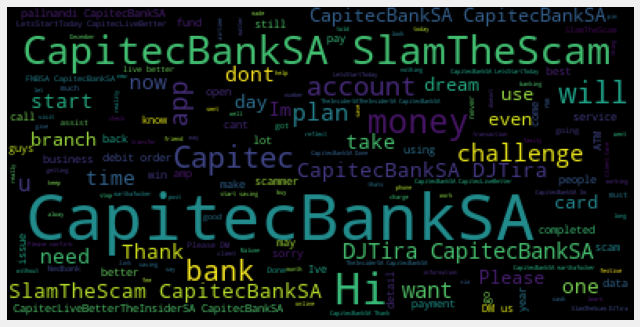

In [96]:
#Plot the word Cloud
tweets = df_c['Capitec_Tweets'].tolist()
tweets_as_one_string = "".join(tweets)
plt.figure(figsize = (10,20))
plt.imshow(WordCloud().generate(tweets_as_one_string))
plt.axis('off')
plt.show()

In [97]:
df_c['Label'] = df_c['Polarity'].apply(getAnalysis)
df_c.head()

,Date,User,Capitec_Tweets,Subjectivity,Polarity,Label
0,2023-01-01 20:00:26+00:00,__Siiwe,I am unable to use your app it keeps kicking m...,0.500000,-0.500000,Negative
1,2023-01-01 17:49:14+00:00,Emperor_Makola,CapitecBankSA Is there any particular reason w...,0.333333,0.166667,Positive
2,2023-01-01 17:21:47+00:00,hobosapians,CapitecBankSA MagdMol4 Will you also receive a...,0.450000,0.400000,Positive
3,2023-01-01 15:06:19+00:00,Officialchidi6,CapitecBankSA hello I have a question I made p...,0.900000,-0.500000,Negative
4,2023-01-01 13:23:25+00:00,Nosiethafeni1,CapitecBankSA so nge5 December bendiyafaka ima...,0.500000,0.458333,Positive


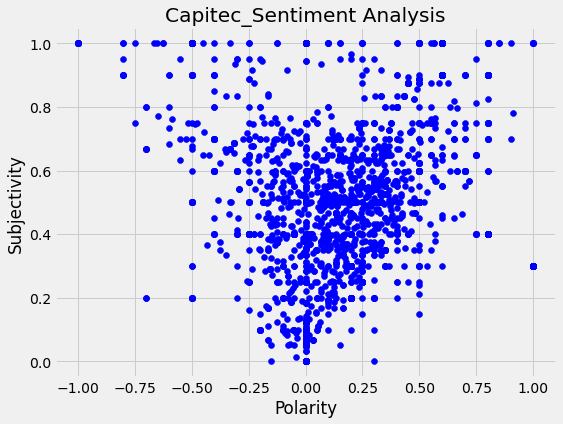

In [98]:
# Plot the Polarity and Subjectivity
plt.figure(figsize = (8,6))
for i in range(0,df_c.shape[0]):
    plt.scatter(df_c['Polarity'][i], df_c['Subjectivity'][i], color = 'Blue')
plt.title('Capitec_Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

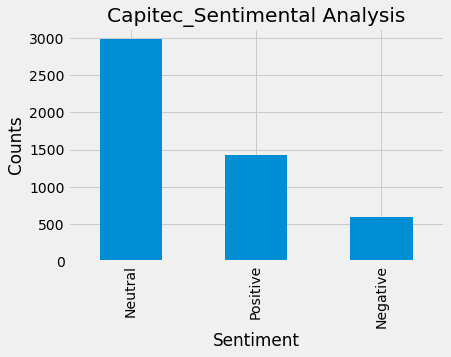

In [99]:
#Show the Value Counts
df_c["Label"].value_counts()
#Plot and Visualize the counts
plt.title("Capitec_Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel('Counts')
df_c["Label"].value_counts().plot(kind="bar")
plt.show()

## Critical Analysis for the Capitec tweets data - Capitec_tweets

The bar chart above shows the Capitec sentiments from the user's tweets. Looking at the chart, one can conclude that the neutral sentiment is dominating with approximately 60% sentiments. This is followed by positive sentiments with approximately 30%, and lastly the negative are too small with approximately 20%, which is a good thing.However improvements needs to be made to reduce neutral sentiments and increase positive ones.

In [100]:
#encoding labels, to make it zeros,ones and twos as digits or integers.
le = LabelEncoder()
df_c['Label'] = le.fit_transform(df_c.Label)

In [101]:
df_c.head()

,Date,User,Capitec_Tweets,Subjectivity,Polarity,Label
0,2023-01-01 20:00:26+00:00,__Siiwe,I am unable to use your app it keeps kicking m...,0.500000,-0.500000,0
1,2023-01-01 17:49:14+00:00,Emperor_Makola,CapitecBankSA Is there any particular reason w...,0.333333,0.166667,2
2,2023-01-01 17:21:47+00:00,hobosapians,CapitecBankSA MagdMol4 Will you also receive a...,0.450000,0.400000,2
3,2023-01-01 15:06:19+00:00,Officialchidi6,CapitecBankSA hello I have a question I made p...,0.900000,-0.500000,0
4,2023-01-01 13:23:25+00:00,Nosiethafeni1,CapitecBankSA so nge5 December bendiyafaka ima...,0.500000,0.458333,2


In [102]:
#Vectorization of the cleaned tweets
vec_c = CountVectorizer(analyzer = tweet_cleaning)
tweets_countVectorize_c = CountVectorizer(analyzer = tweet_cleaning, dtype = 'uint8').fit_transform(df_c['Capitec_Tweets']).toarray()

In [103]:
tweets_countVectorize_c.shape

(5000, 9535)

In [104]:
X = tweets_countVectorize_c
y = df_c['Label']

## Split the data into train and test set and train the model -Capitec_tweets

### Logistic Regression Classifier

In [107]:
# data is split into train and validation set data and model is trained using logistic regression & random forest.
X = tweets_countVectorize_c[:3500, :] 
y = df_c['Label'].values[:3500]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)
model = lr.fit(X_train,y_train)

<AxesSubplot:>

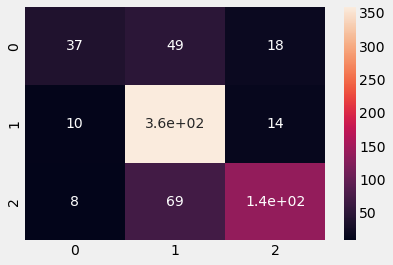

In [108]:
# Prediction of the dataset
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [109]:
# classification report focusing on F1_score evaluation criteria
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.67      0.36      0.47       104
           1       0.75      0.94      0.83       382
           2       0.81      0.64      0.72       214

    accuracy                           0.76       700
   macro avg       0.75      0.64      0.67       700
weighted avg       0.76      0.76      0.74       700



In [110]:
#accuracy
accuracy_score(y_test, y_predict)

0.76

### Random Forest Classifier

In [112]:
model = rf.fit(X_train,y_train)

<AxesSubplot:>

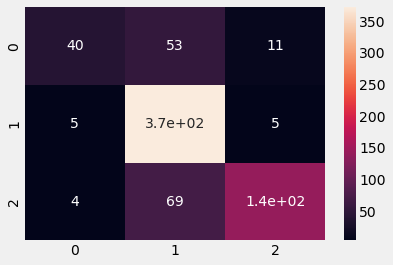

In [113]:
y_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [114]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.38      0.52       104
           1       0.75      0.97      0.85       382
           2       0.90      0.66      0.76       214

    accuracy                           0.79       700
   macro avg       0.82      0.67      0.71       700
weighted avg       0.81      0.79      0.77       700



In [115]:
accuracy_score(y_test, y_predict)

0.79

## Critical Analysis for the accuracy of the trained Models for Capitec Data set

From the two classifiers chosen to train the model, it is clear from the results that the logistic regression classifier and Random forest classifier produced 76% and 79% respectively.random Forest regressor improves the results compared to logistic regression . Random forest will be the best one to use as the final model for Capitec sentimental predictions.

## 9. Nedbank Analysis 

In [121]:
# Collects tweets for nedbank 
query = "(@Nedbank) until:2023-01-02 since:2022-12-01"
tweets = []
limit = 5000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.date,tweet.user.username, tweet.content])

/var/folders/sb/fznt44wn5rbcm9dksfb9qhy40000gn/T/ipykernel_5791/801269349.py:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date,tweet.user.username, tweet.content])


In [122]:
#Create datafrme and save data in a csv file
df_n = pd.DataFrame(tweets, columns = ['Date', 'User', 'Nedbank_Tweets'])
df_Nedbank = df_n.to_csv("Nedbank_Tweets.csv", index = False)
df_n = pd.read_csv('Nedbank_Tweets.csv')
df_n.head()

,Date,User,Nedbank_Tweets
0,2023-01-01 22:59:06+00:00,JohnBas96890900,@ToAmused @Mufasa0062 @crimemind3 @Nedbank Ver...
1,2023-01-01 21:16:08+00:00,hlengiwe_sings,@Mufasa0062 @Nedbank wby don't you honor our d...
2,2023-01-01 21:03:50+00:00,Nedbank,@NothembaBMhlaba Hi there. How was the applica...
3,2023-01-01 20:19:11+00:00,ToAmused,@ZeldaBoshoff4 @Nedbank I’m not sure what your...
4,2023-01-01 19:19:28+00:00,ZeldaBoshoff4,@Nedbank @ToAmused Just top up his bank accoun...


In [123]:
#apply the cleaning function
df_n['Nedbank_Tweets'] = df_n['Nedbank_Tweets'].apply(msg_cleaning)

In [124]:
#Remove emojos
df_n = df_n.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [125]:
df_n.head()

,Date,User,Nedbank_Tweets
0,2023-01-01 22:59:06+00:00,JohnBas96890900,ToAmused Mufasa0062 crimemind3 Nedbank Very close
1,2023-01-01 21:16:08+00:00,hlengiwe_sings,Mufasa0062 Nedbank wby dont you honor our debi...
2,2023-01-01 21:03:50+00:00,Nedbank,NothembaBMhlaba Hi there How was the applicati...
3,2023-01-01 20:19:11+00:00,ToAmused,ZeldaBoshoff4 Nedbank Im not sure what your ta...
4,2023-01-01 19:19:28+00:00,ZeldaBoshoff4,Nedbank ToAmused Just top up his bank account ...


In [126]:
#Call the subjectivity and polarity functions
df_n['Subjectivity'] = df_n['Nedbank_Tweets'].apply(getSubjectivity)
df_n['Polarity'] = df_n['Nedbank_Tweets'].apply(getPolarity)

In [127]:
df_n.head()

,Date,User,Nedbank_Tweets,Subjectivity,Polarity
0,2023-01-01 22:59:06+00:00,JohnBas96890900,ToAmused Mufasa0062 crimemind3 Nedbank Very close,0.300000,0.200000
1,2023-01-01 21:16:08+00:00,hlengiwe_sings,Mufasa0062 Nedbank wby dont you honor our debi...,0.350000,0.100000
2,2023-01-01 21:03:50+00:00,Nedbank,NothembaBMhlaba Hi there How was the applicati...,0.437500,0.000000
3,2023-01-01 20:19:11+00:00,ToAmused,ZeldaBoshoff4 Nedbank Im not sure what your ta...,0.347222,-0.109375
4,2023-01-01 19:19:28+00:00,ZeldaBoshoff4,Nedbank ToAmused Just top up his bank account ...,0.417803,0.254924


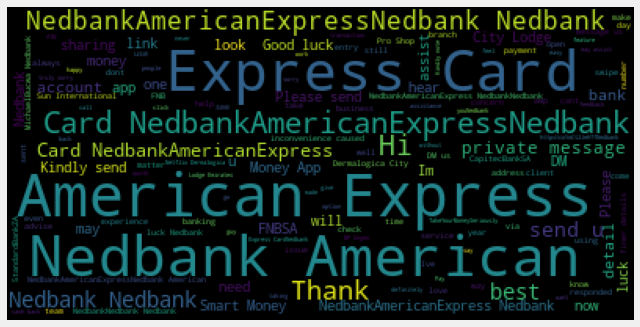

In [129]:
#Plot the word Cloud
tweets = df_n['Nedbank_Tweets'].tolist()
tweets_as_one_string = "".join(tweets)
plt.figure(figsize = (10,20))
plt.imshow(WordCloud().generate(tweets_as_one_string))
plt.axis('off')
plt.show()

In [130]:
#call get analysis function
df_n['Label'] = df_n['Polarity'].apply(getAnalysis)
df_n.head()

,Date,User,Nedbank_Tweets,Subjectivity,Polarity,Label
0,2023-01-01 22:59:06+00:00,JohnBas96890900,ToAmused Mufasa0062 crimemind3 Nedbank Very close,0.300000,0.200000,Positive
1,2023-01-01 21:16:08+00:00,hlengiwe_sings,Mufasa0062 Nedbank wby dont you honor our debi...,0.350000,0.100000,Positive
2,2023-01-01 21:03:50+00:00,Nedbank,NothembaBMhlaba Hi there How was the applicati...,0.437500,0.000000,Neutral
3,2023-01-01 20:19:11+00:00,ToAmused,ZeldaBoshoff4 Nedbank Im not sure what your ta...,0.347222,-0.109375,Negative
4,2023-01-01 19:19:28+00:00,ZeldaBoshoff4,Nedbank ToAmused Just top up his bank account ...,0.417803,0.254924,Positive


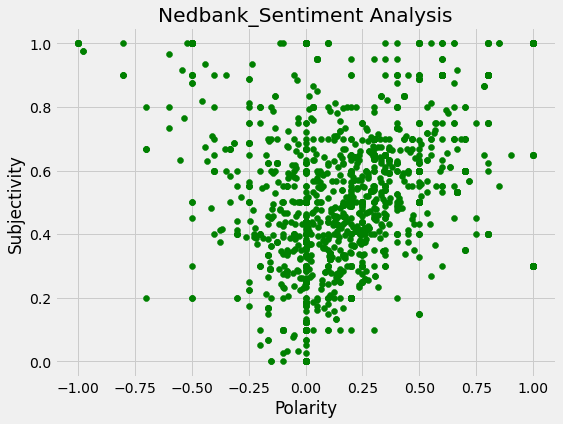

In [131]:
# Plot the Polarity and Subjectivity
plt.figure(figsize = (8,6))
for i in range(0,df_n.shape[0]):
    plt.scatter(df_n['Polarity'][i], df_n['Subjectivity'][i], color = 'green')
plt.title('Nedbank_Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

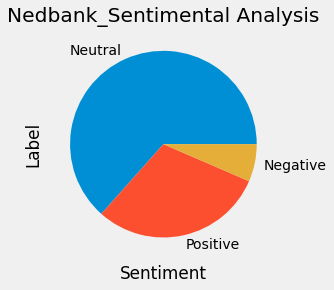

In [132]:
#Show the Value Counts
#df["Analysis"].value_counts()
#Plot and Visualize the counts
plt.title("Nedbank_Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel('Counts')
df_n["Label"].value_counts().plot(kind="pie")
plt.show()

## Critical Analysis for Nedbank Sentiments - Nedbank Data

The pie chart above shows the Nedbank sentiments from the user's tweets. Looking at the chart, one can conclude that the neutral sentiment is dominating with approximately 65% sentiments. This is followed by positive sentiments with approximately 30%, and lastly the negative are too small with approximately 5%, which is a good thing.However improvements needs to be made to reduce neutral sentiments and increase positive ones.

In [133]:
#label encoder
le = LabelEncoder()
df_n['Label'] = le.fit_transform(df_n.Label)

In [134]:
df_n.head()

,Date,User,Nedbank_Tweets,Subjectivity,Polarity,Label
0,2023-01-01 22:59:06+00:00,JohnBas96890900,ToAmused Mufasa0062 crimemind3 Nedbank Very close,0.300000,0.200000,2
1,2023-01-01 21:16:08+00:00,hlengiwe_sings,Mufasa0062 Nedbank wby dont you honor our debi...,0.350000,0.100000,2
2,2023-01-01 21:03:50+00:00,Nedbank,NothembaBMhlaba Hi there How was the applicati...,0.437500,0.000000,1
3,2023-01-01 20:19:11+00:00,ToAmused,ZeldaBoshoff4 Nedbank Im not sure what your ta...,0.347222,-0.109375,0
4,2023-01-01 19:19:28+00:00,ZeldaBoshoff4,Nedbank ToAmused Just top up his bank account ...,0.417803,0.254924,2


In [135]:
# vectorize the data and convert it into an array
vec_n = CountVectorizer(analyzer = tweet_cleaning)
tweets_countVectorize_n = CountVectorizer(analyzer = tweet_cleaning, dtype = 'uint8').fit_transform(df_n['Nedbank_Tweets']).toarray()

In [136]:
tweets_countVectorize_n.shape

(5000, 7155)

In [137]:
X = tweets_countVectorize_n
y = df_n['Label']

## Split the data into train and test set and train the model -Nedbank_tweets

In [138]:
# in this case the data will all be used for training to see the performance
#Split it into train and validation set
X = tweets_countVectorize_n 
y = df_n['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

## Train the model and Assess Trained Model Performance  - Nedbank_Tweets

### Logistic Regression Classifier

In [139]:
lr = LogisticRegression(solver='liblinear')
model = lr.fit(X_train,y_train)

<AxesSubplot:>

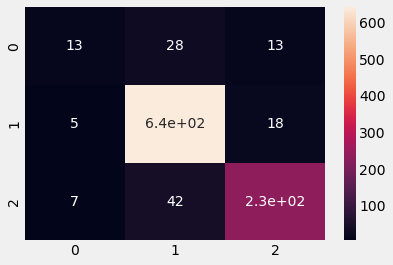

In [140]:
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [141]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.52      0.24      0.33        54
           1       0.90      0.97      0.93       665
           2       0.88      0.83      0.85       281

    accuracy                           0.89      1000
   macro avg       0.77      0.68      0.70      1000
weighted avg       0.88      0.89      0.88      1000



In [142]:
accuracy_score(y_test, y_predict)

0.887

### Random Forest Regression Classifier

In [143]:
model = rf.fit(X_train,y_train)

<AxesSubplot:>

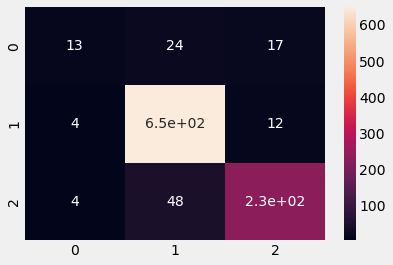

In [144]:
y_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [145]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.24      0.35        54
           1       0.90      0.98      0.94       665
           2       0.89      0.81      0.85       281

    accuracy                           0.89      1000
   macro avg       0.80      0.68      0.71      1000
weighted avg       0.88      0.89      0.88      1000



In [146]:
accuracy_score(y_test, y_predict)

0.891

## Critical Analysis for the accuracy of the trained models utilized - Nedbank Data

From the two classifiers chosen to train the model, it is clear from the results that the logistic regression classifier and Random forest classifier produced 89% and 89% respectively.Both random Forest regressor results and  logistic regression are the same. both regressors will be the best to use as the final model for Nedbank sentimental predictions.

## 10. Standard Bank Analysis

In [147]:
#Collects standard bank tweets
query = "(@StandardBankZA) until:2023-01-02 since:2022-12-01"
tweets = []
limit = 5000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.date,tweet.user.username, tweet.content])

/var/folders/sb/fznt44wn5rbcm9dksfb9qhy40000gn/T/ipykernel_5791/1154792642.py:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date,tweet.user.username, tweet.content])


In [148]:
# Create a data frame and save it in a csv file
df_s = pd.DataFrame(tweets, columns = ['Date', 'User', 'Standard_Tweets'])
df_StdBank = df_s.to_csv("Standard_Tweets.csv", index = False)
df_s = pd.read_csv('Standard_Tweets.csv')
df_s.head()

,Date,User,Standard_Tweets
0,2023-01-01 23:34:30+00:00,random_ct_dave,@MWalkerWilliams @Davos @zenobiaZAG @chasker @...
1,2023-01-01 23:20:00+00:00,Jimmy384212881,@StandardBankZA Yes
2,2023-01-01 22:53:54+00:00,MWalkerWilliams,@blockchaintoken @Davos @zenobiaZAG @chasker @...
3,2023-01-01 22:49:11+00:00,blockchaintoken,@MWalkerWilliams @Davos @zenobiaZAG @chasker @...
4,2023-01-01 22:26:31+00:00,Janice26003840,@StandardBankZA Happy new year 🎉 \n#HowAboutNo...


In [149]:
#Call the cleaning function
df_s['Standard_Tweets'] = df_s['Standard_Tweets'].apply(msg_cleaning)

In [150]:
# remove emojos
df_s = df_s.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [151]:
#call the subjectivity and Polarity function
df_s['Subjectivity'] = df_s['Standard_Tweets'].apply(getSubjectivity)
df_s['Polarity'] = df_s['Standard_Tweets'].apply(getPolarity)

In [152]:
df_s.head()

,Date,User,Standard_Tweets,Subjectivity,Polarity
0,2023-01-01 23:34:30+00:00,random_ct_dave,MWalkerWilliams Davos zenobiaZAG chasker brett...,0.000000,0.000000
1,2023-01-01 23:20:00+00:00,Jimmy384212881,StandardBankZA Yes,0.000000,0.000000
2,2023-01-01 22:53:54+00:00,MWalkerWilliams,blockchaintoken Davos zenobiaZAG chasker brett...,0.000000,0.000000
3,2023-01-01 22:49:11+00:00,blockchaintoken,MWalkerWilliams Davos zenobiaZAG chasker brett...,0.000000,0.000000
4,2023-01-01 22:26:31+00:00,Janice26003840,StandardBankZA Happy new year \nHowAboutNowSu...,0.727273,0.468182


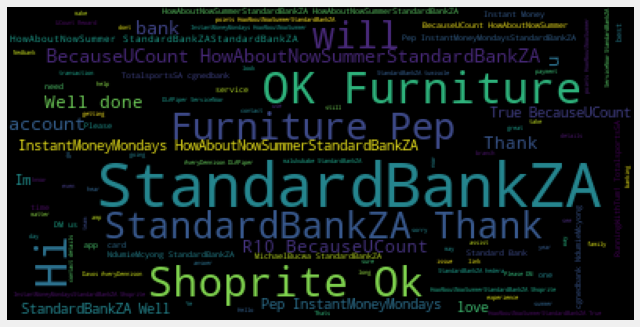

In [153]:
#Plot the word Cloud
tweets = df_s['Standard_Tweets'].tolist()
tweets_as_one_string = "".join(tweets)
plt.figure(figsize = (10,20))
plt.imshow(WordCloud().generate(tweets_as_one_string))
plt.axis('off')
plt.show()

In [154]:
#call the analysis function
df_s['Label'] = df_s['Polarity'].apply(getAnalysis)
df_s.head()

,Date,User,Standard_Tweets,Subjectivity,Polarity,Label
0,2023-01-01 23:34:30+00:00,random_ct_dave,MWalkerWilliams Davos zenobiaZAG chasker brett...,0.000000,0.000000,Neutral
1,2023-01-01 23:20:00+00:00,Jimmy384212881,StandardBankZA Yes,0.000000,0.000000,Neutral
2,2023-01-01 22:53:54+00:00,MWalkerWilliams,blockchaintoken Davos zenobiaZAG chasker brett...,0.000000,0.000000,Neutral
3,2023-01-01 22:49:11+00:00,blockchaintoken,MWalkerWilliams Davos zenobiaZAG chasker brett...,0.000000,0.000000,Neutral
4,2023-01-01 22:26:31+00:00,Janice26003840,StandardBankZA Happy new year \nHowAboutNowSu...,0.727273,0.468182,Positive


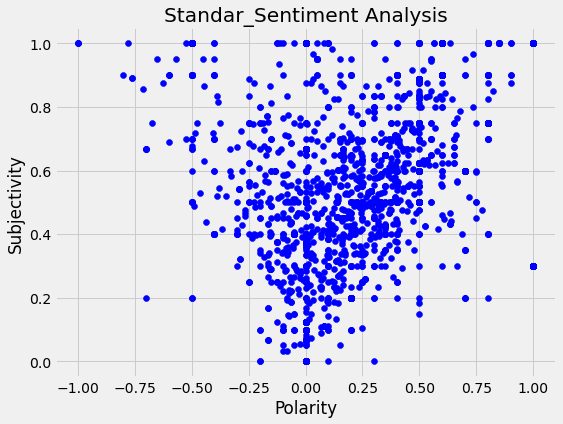

In [155]:
# Plot the Polarity and Subjectivity
plt.figure(figsize = (8,6))
for i in range(0,df_s.shape[0]):
    plt.scatter(df_s['Polarity'][i], df_s['Subjectivity'][i], color = 'blue')
plt.title('Standar_Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

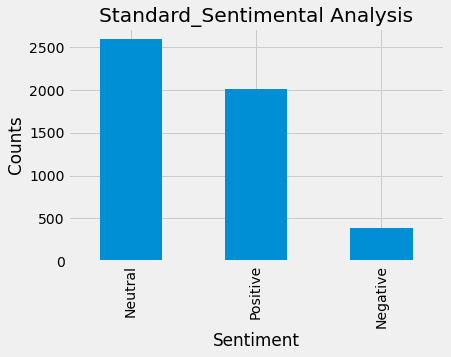

In [156]:
#Show the Value Counts
#df["Analysis"].value_counts()
#Plot and Visualize the counts
plt.title("Standard_Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel('Counts')
df_s["Label"].value_counts().plot(kind="bar")
plt.show()

## Critical Analysis for Standard Bank sentiments - Standard Bank Tweets

The bar chart above shows the Standard Bank sentiments from the user's tweets. Looking at the chart, one can conclude that the neutral sentiment is dominating with approximately 50% sentiments. This is followed by positive sentiments with approximately 40%, and lastly the negative are too small with approximately 10%, which is a good thing.However improvements needs to be made to reduce neutral sentiments and increase positive ones.

In [157]:
# encode the label colum into zeros and 1s
le = LabelEncoder()
df_s['Label'] = le.fit_transform(df_s.Label)

In [158]:
df_s.head()

,Date,User,Standard_Tweets,Subjectivity,Polarity,Label
0,2023-01-01 23:34:30+00:00,random_ct_dave,MWalkerWilliams Davos zenobiaZAG chasker brett...,0.000000,0.000000,1
1,2023-01-01 23:20:00+00:00,Jimmy384212881,StandardBankZA Yes,0.000000,0.000000,1
2,2023-01-01 22:53:54+00:00,MWalkerWilliams,blockchaintoken Davos zenobiaZAG chasker brett...,0.000000,0.000000,1
3,2023-01-01 22:49:11+00:00,blockchaintoken,MWalkerWilliams Davos zenobiaZAG chasker brett...,0.000000,0.000000,1
4,2023-01-01 22:26:31+00:00,Janice26003840,StandardBankZA Happy new year \nHowAboutNowSu...,0.727273,0.468182,2


In [159]:
# vectorize the data and convert it into an array
vec_s = CountVectorizer(analyzer = tweet_cleaning)
tweets_countVectorize_s = CountVectorizer(analyzer = tweet_cleaning, dtype = 'uint8').fit_transform(df_s['Standard_Tweets']).toarray()

In [160]:
tweets_countVectorize_s.shape

(5000, 7604)

In [161]:
X = tweets_countVectorize_s
y = df_s['Label']

## Split the data into train and test set and train the model -Standard bank_tweets

In [162]:
#Split the data into train and validation set
X = tweets_countVectorize_s 
y = df_s['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

## Train the model and Assess Trained Model Performance  - Standard Bank_Tweets

### Logistic Regression Classifier

In [163]:
model = lr.fit(X_train,y_train)

<AxesSubplot:>

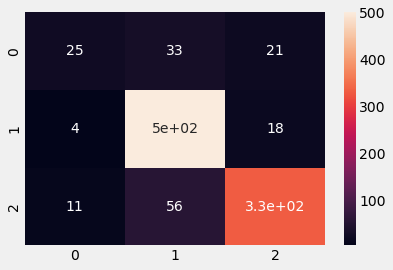

In [164]:
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [165]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.62      0.32      0.42        79
           1       0.85      0.96      0.90       523
           2       0.89      0.83      0.86       398

    accuracy                           0.86      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.85      0.86      0.85      1000



In [166]:
accuracy_score(y_test, y_predict)

0.857

### Random Regression Classifier

In [167]:
model = rf.fit(X_train,y_train)

<AxesSubplot:>

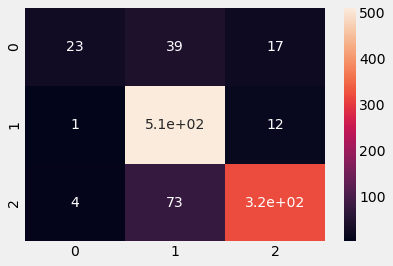

In [168]:
y_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [169]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.29      0.43        79
           1       0.82      0.98      0.89       523
           2       0.92      0.81      0.86       398

    accuracy                           0.85      1000
   macro avg       0.85      0.69      0.73      1000
weighted avg       0.86      0.85      0.84      1000



In [170]:
accuracy_score(y_test, y_predict)

0.854

## Critical Analysis for the accuracy of the trained model - Standard bank data

From the two classifiers chosen to train the model, it is clear from the results that the logistic regression classifier and Random forest classifier produced 85% and 85% respectively.Both random Forest regressor results and  logistic regression are the same. both regressors will be the best to use as the final model for Standard Bank sentimental predictions.

## 10. First National Bank (FNB) Analysis

In [171]:
# collect the tweets for FNB
query = "(@FNBSA) until:2023-01-02 since:2022-12-01"
tweets = []
limit = 5000
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)==limit:
        break
    else:
        tweets.append([tweet.date,tweet.user.username, tweet.content])

/var/folders/sb/fznt44wn5rbcm9dksfb9qhy40000gn/T/ipykernel_5791/807541612.py:8: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date,tweet.user.username, tweet.content])


In [173]:
#create the data frame and save it to csv file
df_f = pd.DataFrame(tweets, columns = ['Date', 'User', 'FNB_Tweets'])
df_FNB = df_f.to_csv("FNB_Tweets.csv", index = False)
df_f = pd.read_csv('FNB_Tweets.csv')
df_f.head()

,Date,User,FNB_Tweets
0,2023-01-01 22:53:58+00:00,WeFCBusiness,@FNBSA Kanjani when you are charging us so muc...
1,2023-01-01 22:50:37+00:00,Kennedy20556260,@FNBSA #FNBCashFreeSummer I paid my Municipal ...
2,2023-01-01 22:46:07+00:00,Celine19486331,@FNBSA I pay my Rent bill from my app simple a...
3,2023-01-01 22:42:56+00:00,Yasmin09956945,@FNBSA I pay all my bills from my municipal bi...
4,2023-01-01 22:38:47+00:00,bheemthembu,@FNBSA I pay my Mr price account


In [174]:
# call the cleaning function
df_f['FNB_Tweets'] = df_f['FNB_Tweets'].apply(msg_cleaning)

In [175]:
#removing Emojis
df_f = df_f.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [176]:
df_f.head()

,Date,User,FNB_Tweets
0,2023-01-01 22:53:58+00:00,WeFCBusiness,FNBSA Kanjani when you are charging us so much...
1,2023-01-01 22:50:37+00:00,Kennedy20556260,FNBSA FNBCashFreeSummer I paid my Municipal bi...
2,2023-01-01 22:46:07+00:00,Celine19486331,FNBSA I pay my Rent bill from my app simple an...
3,2023-01-01 22:42:56+00:00,Yasmin09956945,FNBSA I pay all my bills from my municipal bil...
4,2023-01-01 22:38:47+00:00,bheemthembu,FNBSA I pay my Mr price account


In [177]:
# call the Subjectivity and polarity functions
df_f['Subjectivity'] = df_f['FNB_Tweets'].apply(getSubjectivity)
df_f['Polarity'] = df_f['FNB_Tweets'].apply(getPolarity)

In [178]:
df_f.head()

,Date,User,FNB_Tweets,Subjectivity,Polarity
0,2023-01-01 22:53:58+00:00,WeFCBusiness,FNBSA Kanjani when you are charging us so much...,0.488636,0.084091
1,2023-01-01 22:50:37+00:00,Kennedy20556260,FNBSA FNBCashFreeSummer I paid my Municipal bi...,0.000000,0.000000
2,2023-01-01 22:46:07+00:00,Celine19486331,FNBSA I pay my Rent bill from my app simple an...,0.595238,0.216667
3,2023-01-01 22:42:56+00:00,Yasmin09956945,FNBSA I pay all my bills from my municipal bil...,0.450000,-0.150000
4,2023-01-01 22:38:47+00:00,bheemthembu,FNBSA I pay my Mr price account,0.000000,0.000000


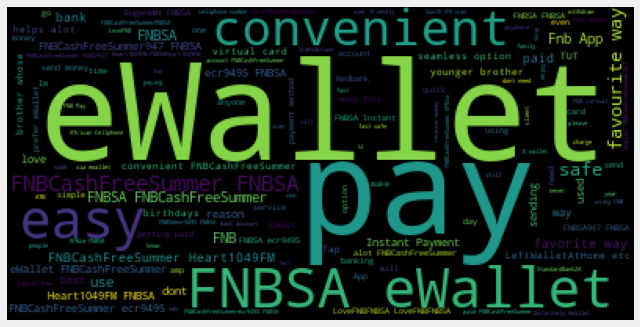

In [179]:
#Plot the word Cloud
tweets = df_f['FNB_Tweets'].tolist()
tweets_as_one_string = "".join(tweets)
plt.figure(figsize = (10,20))
plt.imshow(WordCloud().generate(tweets_as_one_string))
plt.axis('off')
plt.show()

In [180]:
# call get Analysis function
df_f['Label'] = df_f['Polarity'].apply(getAnalysis)
df_f.head()

,Date,User,FNB_Tweets,Subjectivity,Polarity,Label
0,2023-01-01 22:53:58+00:00,WeFCBusiness,FNBSA Kanjani when you are charging us so much...,0.488636,0.084091,Positive
1,2023-01-01 22:50:37+00:00,Kennedy20556260,FNBSA FNBCashFreeSummer I paid my Municipal bi...,0.000000,0.000000,Neutral
2,2023-01-01 22:46:07+00:00,Celine19486331,FNBSA I pay my Rent bill from my app simple an...,0.595238,0.216667,Positive
3,2023-01-01 22:42:56+00:00,Yasmin09956945,FNBSA I pay all my bills from my municipal bil...,0.450000,-0.150000,Negative
4,2023-01-01 22:38:47+00:00,bheemthembu,FNBSA I pay my Mr price account,0.000000,0.000000,Neutral


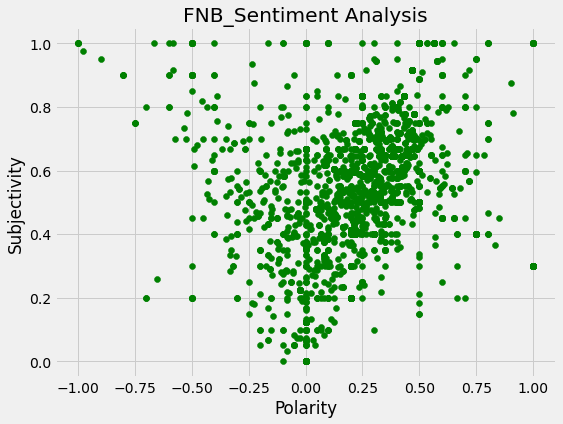

In [181]:
# Plot the Polarity and Subjectivity
plt.figure(figsize = (8,6))
for i in range(0,df_f.shape[0]):
    plt.scatter(df_f['Polarity'][i], df_f['Subjectivity'][i], color = 'green')
plt.title('FNB_Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

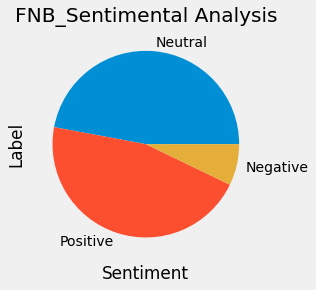

In [182]:
#Plot and Visualize the counts
plt.title("FNB_Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel('Counts')
df_f["Label"].value_counts().plot(kind="pie")
plt.show()

## critical Analysis for FNB sentiments for FNB - FNB Tweets

The pie chart above shows the FNB sentiments from the user's tweets. Looking at the chart, one can conclude that the positive sentiment is almost the same with positive sentiments with approximately 48% each, and lastly the negative are too small with approximately 4%, which is a good thing.However improvements needs to be made to reduce neutral sentiments and increase positive ones.

In [183]:
#encode the labels into zeros and 1s
le = LabelEncoder()
df_f['Label'] = le.fit_transform(df_f.Label)

In [184]:
df_f.head()

,Date,User,FNB_Tweets,Subjectivity,Polarity,Label
0,2023-01-01 22:53:58+00:00,WeFCBusiness,FNBSA Kanjani when you are charging us so much...,0.488636,0.084091,2
1,2023-01-01 22:50:37+00:00,Kennedy20556260,FNBSA FNBCashFreeSummer I paid my Municipal bi...,0.000000,0.000000,1
2,2023-01-01 22:46:07+00:00,Celine19486331,FNBSA I pay my Rent bill from my app simple an...,0.595238,0.216667,2
3,2023-01-01 22:42:56+00:00,Yasmin09956945,FNBSA I pay all my bills from my municipal bil...,0.450000,-0.150000,0
4,2023-01-01 22:38:47+00:00,bheemthembu,FNBSA I pay my Mr price account,0.000000,0.000000,1


In [185]:
# vectorize the data and convert it into an array
vec_f = CountVectorizer(analyzer = tweet_cleaning)
tweets_countVectorize_f = CountVectorizer(analyzer = tweet_cleaning, dtype = 'uint8').fit_transform(df_f['FNB_Tweets']).toarray()

In [186]:
tweets_countVectorize_f.shape

(5000, 6358)

In [187]:
X = tweets_countVectorize_f
y = df_f['Label']

## Split the data into train and test set and train the model -FNB bank_tweets

In [188]:
#Split the data into train and validation set
X = tweets_countVectorize_f 
y = df_f['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

## Train the model and Assess Trained Model Performance  - FNB_Tweets

### Logistic Regression Classifier

In [189]:
model = lr.fit(X_train,y_train)

<AxesSubplot:>

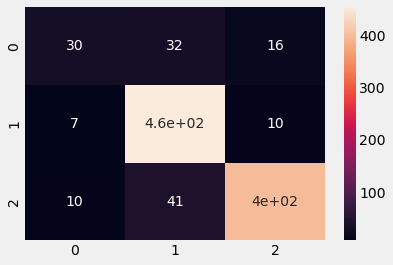

In [190]:
y_predict = lr.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [193]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.38      0.48        78
           1       0.86      0.96      0.91       472
           2       0.94      0.89      0.91       450

    accuracy                           0.88      1000
   macro avg       0.81      0.75      0.77      1000
weighted avg       0.88      0.88      0.88      1000



In [194]:
accuracy_score(y_test, y_predict)

0.884

### Random Forest Regression Classifier

In [195]:
model = rf.fit(X_train,y_train)

<AxesSubplot:>

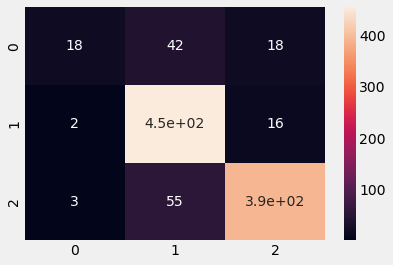

In [196]:
y_predict = rf.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)

In [197]:
cr = classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.23      0.36        78
           1       0.82      0.96      0.89       472
           2       0.92      0.87      0.89       450

    accuracy                           0.86      1000
   macro avg       0.84      0.69      0.71      1000
weighted avg       0.86      0.86      0.85      1000



In [198]:
accuracy_score(y_test, y_predict)

0.864

## Critical Analysis for the accuracy of the trained Models - FNB Data

From the two classifiers chosen to train the model, it is clear from the results that the logistic regression classifier and Random forest classifier produced 88% and 86% respectively.In this case of FNB model,  logistic regression is slightly better that Random Forest regressossion. Logistic regression will be the best to use as the final model for FNB sentimental predictions.

## 11. Overall Key Insights and Critical Analysis for All the Banks

If one look at the results of these banks, in all of them the negative feeling is small especially the FNB, followed by other banks.At the same time Neutral status is also dominating in all of these banks except FNB again, followed by positive sentiments. This means the all these banks have improved their services considering significantly in the month of December 2022. The data used was reasonable enough to perform this analysis, each bank had 5000 sample of tweets in December. Considering that these tweeets are from different users, not the bank handlers only. These results suggest that customers were a little bit happy with the service especially customers from FNB. Capitec and ABSA have similar results wich they both below par when compared to other banks.

Even when we look at the word cloud graphs for the words mostly used in these tweets, we can clearly see that these words are either neutral or positive, very few words that are negative. In terms of accuracy, random forest was the winner in terms of classifiers with Nedbank scoring the highest of 89%, followed by FNB - 88%, then Standard bank-86%, ABSA-84% and Capitec-79%. Even though improvements are required, but the model accuracy in all these banks is good enough.

The aim in the beginning was to get the feeling of the bank's customers about their services and also to train the model to acjieve atleast 75% accuracy. As indicated by the results, all the banks are on the neutral point of the scale with a little bit of positive and very small negative sentiments. FNB is the bank that has a good service according the data. In all banks, a trained model of more than 75% was achieved with both Logistical and Random Forest regressions doing quite well. However improvements of the model is still required.

## 12. Conclusion and Future work

A twitter sentimental analysis was conducted for the major banks in South Africa. The data was sourced from twitter social media application through an API and snscrape package. Access application was done to twittwer to get the permission to collect tweets from their application. Exploratory data analysis was conducted uses libraries and data pipeline to achive the results obtained. It is clear from the results that the banks have made significantly improvements to service their customers. this is seen from the customers sentiments in the festive season period. Future work needs to be done to understand and display the exact feelings of each individual such angry, fear, joy, sadness etc.Furthermore, Training models needs to be improved to be very close to 100%.

## 13. References

###### Course web notes, https://learn.london.ac.uk/course/view.php?id=1347, Accessed October 2022 to March 2023
###### Twitter developer website, https://developer.twitter.com/en/portal/dashboard, Accessed October 2022 to March 2023
######  Scikit Learn website , https://scikit-learn.org/stable/, Accessed October 2022 to March 2023
###### pypi Website, https://pypi.org/project/snscrape/, Accessed January 2023 to March 2023
###### DataSciencedojo website, https://datasciencedojo.com/blog/scrape-twitter-data-using-snscrape/, Accessed January 2023 to March 2023

